In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Introduction

Il faut à présent analyser nos données pour mieux comprendre notre problème

In [3]:
df = pd.read_csv("data/intermediate/Telco_clean.csv")

# Analyses des données

## I Analyse des données catégorielles

L'analyse se divise en de temps:

1) analyse univariée 
Elle se concentre sur:
- la répartition entre les valeurs
- la définition précise de l'attribut et de ses valeurs
- la représentativité de notre échantillon par rapport à une norme 

Représenter chaque attribut est un prétexte pour s'y arreter et y réfléchir. Ce temps d'analyse est crucial et nécessite une connaissance pointue du métier et des tables utilisées. C'est cette analyse qui distingue le data scientist expérimenté du data scientist débutant ou de la machine

2) analyse bivariée
Elle se concencentre sur deux points:
- la relation entre la variable explicative et la variable cible: corrélation = importance
- la relation entre la variables explicative et les autres variables explicatives: correlation = même information

Ces analyses vont nous permettre d'améliorer notre modèle mais également de construire de nouveaux attributs potentiellement plus pertinents


Important, un graphique doit contenir:
- un titre
- une légende
- une analyse


### Analyse du Churn

In [6]:
def custom_pie_plot(series,title):
    labels = series.value_counts().index
    values = series.value_counts()

    values.plot.pie(autopct="%1.1f%%", pctdistance=0.7, figsize=(5,5), labels=None)
    plt.title(title, fontsize=15, color="white")
    plt.legend(labels, bbox_to_anchor=(0.01, 0.75),
            fontsize=12)

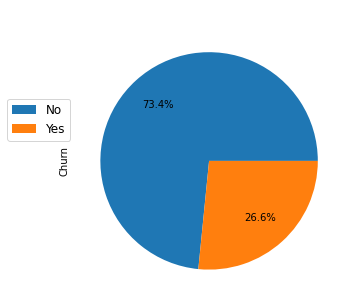

In [7]:
custom_pie_plot(df["Churn"], "distribution du churn")

- analyse de la répartition: On voit qu'il y a un déséquilibre dans notre base de données entre les deux labels de notre variable cible. Il faudra en tenir compte dans notre modèle.
- analyse des définitions: définition du churn floue.


### Analyse de l'attribut genre:

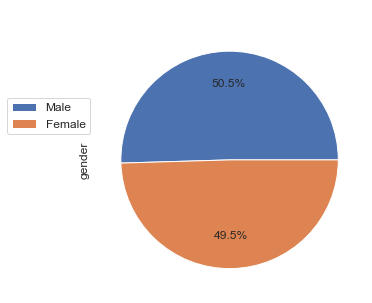

In [55]:
custom_pie_plot(df["gender"], "distribution by gender")

Deux catégories sont retenues pour le genre "Male" et "Female"

La répartition par genre est équilibrée, elle est globalement représentative de la population amériquaine meme si on note une part un peu plus importante d'homme.

In [78]:
# On passe à l'analyse multivairée

# On utilise pour les variables catégorielles entre elles une Pivot table en pourcentages
def pivot_table_with_churn(col):
    cont = df[[f"{col}","Churn"]].pivot_table(index=col,columns="Churn",aggfunc=len,margins=True,margins_name="Total")
    return round(cont.div( cont.iloc[:,-1], axis=0).mul(100),2)
    #return round(cont.div(len(df.index)).mul(100),2)

pivot_table_with_churn("gender")


Churn,No,Yes,Total
gender,,,
Female,73.04,26.96,100.0
Male,73.80,26.20,100.0
Total,73.42,26.58,100.0


On voit ici que la répartition des personnes qui churn entre les deux valeurs de gender est exactement la meme. Il semble donc que gender soit très peut corrélé au churn et donc que son pouvoir explicatif soit très faible

On ne peut pas parler de corrélation entre deux variables catégorielles. Le lien entre ces deux vairables doit être analysé à l'aide d'un autre outil. Cet outil est le test du Chi-2 d'indépendance.

La P-Value du test du chi-2 correspond à la probabilité d'obtenir les données que nous avons quand l'hypothèse (nulle HO) Les deux variables sont indépendantes est valide.


In [8]:
def independance_from_churn(col):
    CrosstabResult=pd.crosstab(index=df[f'{col}'],columns=df['Churn'])
    
    # importing the required function
    from scipy.stats import chi2_contingency
    
    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(CrosstabResult)
    
    # P-Value is the Probability of H0 being True
    # If P-Value&gt;0.05 then only we Accept the assumption(H0)
    independance = True if ChiSqResult[1] > 0.05 else False
    
    return (ChiSqResult[1],independance)

independance_from_churn('gender')

(0.4904884707065509, True)

Quand la p-value est inférieure à 0.05 on rejette l'hypothèse d'indépendance
Ici on ne peut pas la rejeter.
On suppose donc que le churn est indépendant du genre, le fait d'avoir un certain genre n'a pas d'impact sur le churn. 

# Consignes

**`Consignes`**
- Analysez les autres atributs catégoriels et creez de nouveaux attributs si cela vous semble pertinent
- Répondre aux questions suivantes:
    - Quels sont les différents services de Telco? Peut on souscrire à tous les services ou à aucun service?
    - Quelles sont les options du service internet, combien d'option internet en moyenne on les clients de Telco?
    - Quels attributs semblent avoir un pouvoir explicatif.

## II Analyse des données quantitatives

## Analyse de tenure

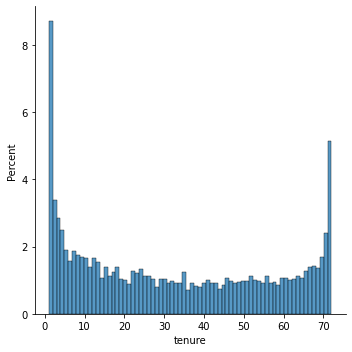

In [8]:
sns.displot(df, x="tenure", stat="percent", bins= 72)

On voit que la distribution est en U
2O% de la base correspond à des clients tout nouveaux <5 mois
12% correspondent à des clients anviens >70 mois

/Users/charles/Documents/pythonProject/Introduction_ml_classification/env/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/charles/Documents/pythonProject/Introduction_ml_classification/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/charles/Documents/pythonProject/Introduction_ml_classification/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot`

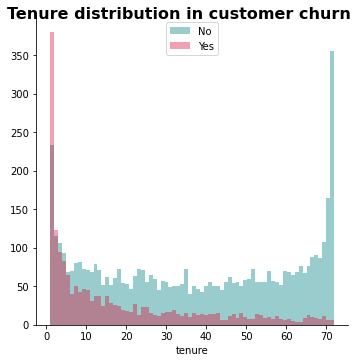

In [10]:
ax = sns.FacetGrid(df, hue='Churn', palette=["teal", "crimson"], size=5, aspect=1)
ax = ax.map(sns.distplot, "tenure",  hist=True, kde=False, bins=72)
ax.fig.suptitle('Tenure distribution in customer churn', y=1, fontsize=16, fontweight='bold')
plt.legend()

On constate un lien important entre le churn et l'ancienneté

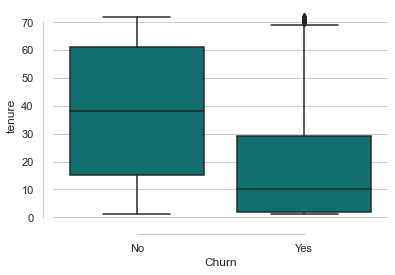

In [107]:
sns.boxplot(x="Churn", y="tenure",palette=["teal"],
            data=df)
sns.despine(offset=10, trim=True)

Les personnes qui résilie leur contrat ont en moyenne 10 mois d'ancienneté quand ceux qui ne résilient pas en ont 40.

Pour tester l'indépendance entre une variable quantitative et une variable qualitative, on peut utiliser le modèle anova. Le modèle anova test si les instances de différents groupes (les valeurs de la variable catégorielle) proviennent ou non d'un meme population. Pour cela on va tester que les moyennes pour une certaine vairable continue sont similaires ou non.
Si les moyennes sont similaires alors les deux variables sont indépendantes. 


In [111]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
stats.f_oneway(df['tenure'][df['Churn'] == 'Yes'],
               df['tenure'][df['Churn'] == 'No'])

F_onewayResult(statistic=1007.5094314093412, pvalue=9.437650217603554e-207)

La p-value est largement inférieur à 0.05, on doit donc rejeter l'hypothèse d'indépendance

## Consignes

Analyser les autres variables quantitatives:
- MonthlyCharges
- TotalCharges
- nbr_option_internet

# Correlation entre les attributs

Dans un modèle de machine learning on essaie de prédire une variable y en fonction de variables explicatives x:
- Chaque variable explicative x a un certain pouvoir explicatif de y qui peut être estimé par la "correlation" entre x et y
- Si deux variables x1 et x2 sont corrélées entre elles, c'est qu'elles ont le meme pouvoir explicatif de y, ainsi elles font doublons et on cherchera à ne pas les garder toutes les deux dans un meme modèle pour diverse raisons.


## Consignes:

- Qu'est ce que le Pearson’s R, le Correlation Ratio et le V de Cramer 
- Que déduisez vous de la heatmap entre les variables qualitatives?
- Que déduisez vous de la heatmap entre les variables quantitatives
- Faudrait-il garder la variable Nombre d'option et les différentes variables d'option dans une meme modèle? Justifiez votre réponse.

## Lien entre les variables catégorielles

After preparing the separate data frame, we are going to use the below code to generate the correlation for categorical variables.


In [156]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

# We can select categorial data
categorical_features=identify_nominal_columns(df)

selected_column= df[categorical_features]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df.drop('customerID', inplace=False, axis=1), compute_only=True, figsize=(10,10))

<AxesSubplot:>

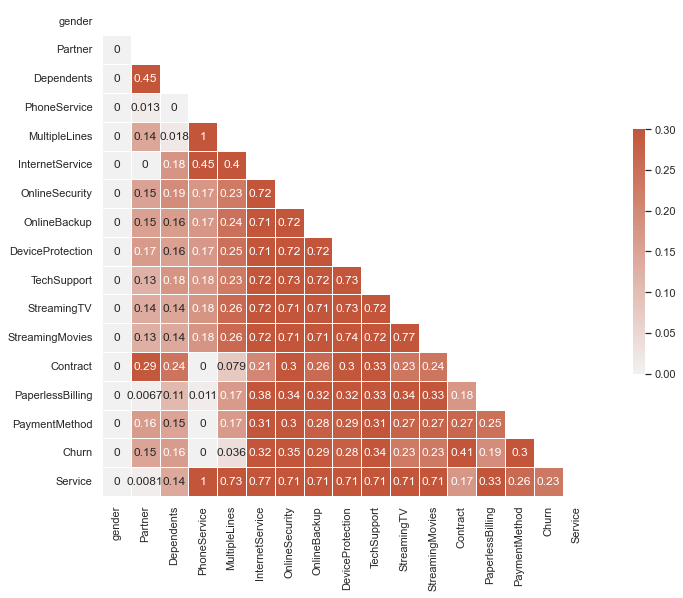

In [157]:
mask = np.triu(np.ones_like(categorical_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(categorical_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
 

- la heat permet de comparer la corrélation entre la variable cible et les variable explicative; Ici on voit que c'est contrat .

On peut passer toutes les variables en revue pour voir leur corrélation avec les autres
- gender: corréler avec rien: on ne va surement pas la retenir.
- Partner: waring correlation avec dependants: certainement regrouper ces varaibles,

## Correlation entre les variables quantitatives

<AxesSubplot:>

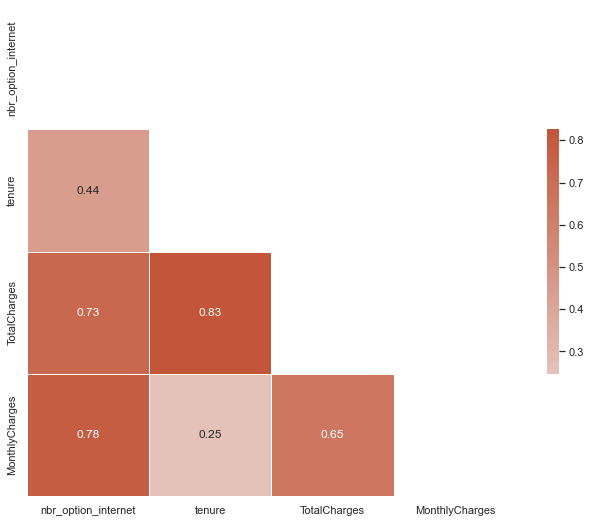

In [145]:
# Compute the correlation matrix
corr = df[["nbr_option_internet","tenure","TotalCharges","MonthlyCharges"]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

## Correlation entre les variables catégorielles et quantitatives

We use the association fonction from dython package. 

It calculates the correlation/strength-of-association of features in the data-set with both categorical and continuous features using: 
- Pearson’s R for continuous-continuous cases
- Correlation Ratio for categorical-continuous cases
- Cramer’s V or Theil’s U for categorical-categorical cases.

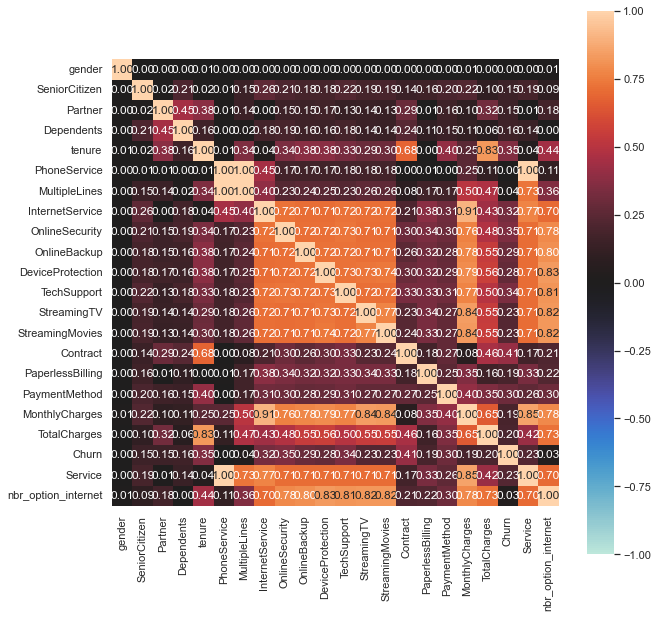

In [149]:
complete_correlation= associations(df.drop('customerID', inplace=False, axis=1), figsize=(10,10),compute_only=True)

<AxesSubplot:>

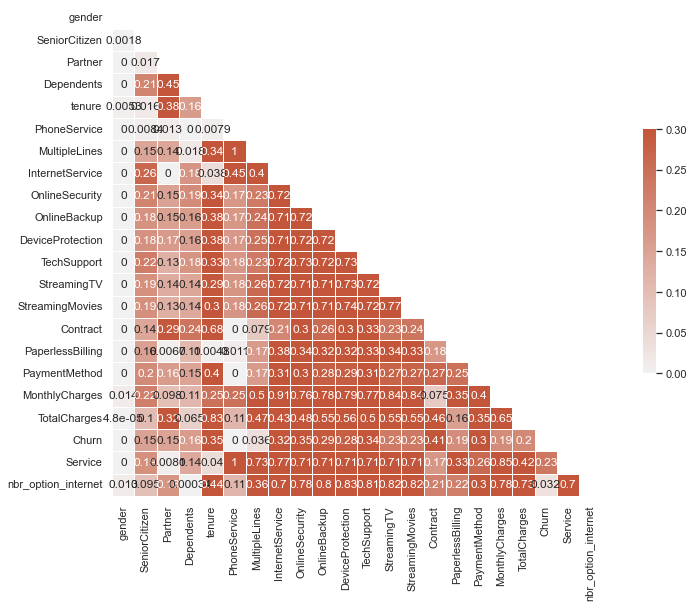

In [147]:
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
 

# Sauvegarde

In [159]:
#df.to_csv('data/intermediate/Telco_post_analysis.csv', index=False)